In [1]:
# project: p5
# submitter: xyang467
# partner: none
# hours: 12

In [2]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
from io import TextIOWrapper
import re
from graphviz import Digraph
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box, Point
from matplotlib import cm

In [3]:
#Q1
with ZipFile('server_log.zip') as zf:
    with zf.open("rows.csv") as f:
         df = pd.read_csv(f)
int(df["size"].sum())

24801002666

In [4]:
#Q2
df1 = df.copy()
df1['count'] = 1
df2 = df1.groupby(by = ["ip"]).sum().sort_values(by = ["count"], ascending=False)
df2[0:10].to_dict()["count"]

{'54.152.17.ccg': 12562,
 '183.195.251.hah': 6524,
 '52.45.218.ihf': 5562,
 '68.180.231.abf': 5493,
 '204.212.175.bch': 4708,
 '103.238.106.gif': 4428,
 '208.77.215.jeh': 3903,
 '208.77.214.jeh': 3806,
 '217.174.255.dgd': 3551,
 '82.13.163.caf': 3527}

In [5]:
#Q3
sum(df["code"]>=400)/len(df)

0.03466852724527611

In [6]:
#Q4
df1["file"] = df1["cik"].astype(int).astype(str)+ "/"+ df1["accession"]+"/"+ df1["extention"]
df3 = df1.groupby(by = ["file"],as_index=False).sum().sort_values(by = ["count"], ascending=False)
df3["file"].iloc[0]

'1627631/0001627631-15-000004/.txt'

In [7]:
#Q5
sum(df["crawler"] ==1)

971

In [8]:
import edgar_utils

In [9]:
#Q6
df2 = df2.reset_index()
df2["region"] = df2["ip"].apply(edgar_utils.lookup_region)
df4 = df2.groupby(by = ["region"],as_index=False).sum().sort_values(by = ["count"], ascending=False)
df4["region"].iloc[0]

'United States of America'

In [10]:
#Q7
df2["high_volume"] = (df2["count"]>1000).astype(int)
df2["volume"] = 1
df5 = df2.groupby(by = ["region"],sort=False).sum()
df5["fraction"] = df5["high_volume"]/df5["volume"]
df5.to_dict()["fraction"]

{'United States of America': 0.019862490450725745,
 'China': 0.006864988558352402,
 'India': 0.058823529411764705,
 'United Kingdom of Great Britain and Northern Ireland': 0.06666666666666667,
 'Korea (Republic of)': 0.2,
 'Canada': 0.017857142857142856,
 'France': 0.0036900369003690036,
 'Bulgaria': 0.3333333333333333,
 'Ireland': 0.3125,
 'Australia': 0.07692307692307693,
 'Hong Kong': 0.0,
 'Germany': 0.0,
 'Czechia': 0.0,
 'Estonia': 0.0,
 'Viet Nam': 0.0,
 'Poland': 0.0,
 'Netherlands': 0.0,
 '-': 0.0,
 'Slovakia': 0.0,
 'Russian Federation': 0.0,
 'Spain': 0.0,
 'Indonesia': 0.0,
 'Ukraine': 0.0,
 'Croatia': 0.0,
 'Taiwan (Province of China)': 0.0,
 'Italy': 0.0,
 'Virgin Islands (British)': 0.0,
 'Singapore': 0.0,
 'Liberia': 0.0,
 'Israel': 0.0,
 'Romania': 0.0,
 'Luxembourg': 0.0,
 'Denmark': 0.0,
 'Switzerland': 0.0,
 'Sweden': 0.0,
 'Egypt': 0.0,
 'Honduras': 0.0,
 'Brazil': 0.0,
 'Greece': 0.0,
 'Philippines': 0.0,
 'Iraq': 0.0,
 'South Africa': 0.0,
 'Tanzania, United Repu

In [11]:
#Q8
filename_filing = dict()
with ZipFile('docs.zip') as zf:
    for name in zf.namelist():
        filename = re.findall(r'.+\/.+\/.+',name)
        if filename != []:
            with zf.open(filename[0], "r") as f:
                tio = TextIOWrapper(f)
                html = tio.read()
                obj = edgar_utils.Filing(html)
                filename_filing[filename[0]] = obj
filename_filing["850693/0000850693-07-000159/-index.htm"].dates

['2007-07-25', '2007-07-25', '2007-07-23']

In [12]:
#Q9
def f(file):
    return filename_filing[file].state()
file_state = pd.DataFrame({'file': filename_filing.keys()})
file_state['state'] = file_state['file'].apply(f)
file_state['count'] = 1
file_state.groupby(by = ["state"],sort=False).sum().sort_values(by = ["count"], ascending=False).to_dict()['count']

{'CA': 91,
 'NY': 83,
 'TX': 64,
 'MA': 30,
 'PA': 25,
 'IL': 25,
 'CO': 25,
 'NJ': 23,
 'FL': 21,
 'MN': 15,
 'VA': 15,
 'CT': 14,
 'MD': 13,
 'MI': 11,
 'OH': 10,
 'DE': 10,
 'WI': 9,
 'NC': 9,
 'GA': 8,
 'OK': 7,
 'NV': 6,
 'IA': 6,
 'OX': 6,
 'AZ': 5,
 'KS': 5,
 'UT': 5,
 'TN': 4,
 'MO': 4,
 'IN': 4,
 'WA': 3,
 'WV': 2,
 'OR': 2,
 'LA': 2,
 'NE': 2,
 'KY': 2,
 'AL': 1,
 'SD': 1,
 'MS': 1,
 'VT': 1,
 'ID': 1,
 'AR': 1,
 'NM': 1,
 'DC': 1,
 'ME': 1}

In [13]:
#Q10
def s(file):
    return filename_filing[file].sic
file_sic = pd.DataFrame({'file': filename_filing.keys()})
file_sic['sic'] = file_sic['file'].apply(s)
file_sic['count'] = 1
file_sic = file_sic.dropna()
file_sic['sic'] = file_sic['sic'].astype(int)
file_sic.groupby(by = ["sic"],sort=False).sum().sort_values(by = ["count"], ascending=False).to_dict()['count']

{2834: 40,
 6021: 20,
 6798: 20,
 6022: 20,
 1311: 20,
 1389: 19,
 6211: 17,
 6189: 17,
 2836: 13,
 7389: 11,
 7372: 11,
 6029: 11,
 1000: 11,
 6331: 10,
 4911: 8,
 6282: 8,
 6199: 8,
 2860: 8,
 7370: 7,
 3841: 6,
 7371: 6,
 3674: 5,
 900: 5,
 4931: 5,
 3826: 5,
 4522: 5,
 1700: 5,
 8742: 5,
 6035: 4,
 4813: 4,
 3842: 4,
 2510: 4,
 3663: 4,
 7374: 4,
 5812: 4,
 3420: 3,
 6799: 3,
 3510: 3,
 8062: 3,
 1400: 3,
 3829: 3,
 2800: 3,
 7200: 3,
 7373: 3,
 6221: 3,
 3576: 3,
 3620: 3,
 3845: 2,
 2810: 2,
 1382: 2,
 4512: 2,
 7812: 2,
 3690: 2,
 3679: 2,
 5661: 2,
 7900: 2,
 5065: 2,
 4812: 2,
 3621: 2,
 5122: 2,
 3661: 2,
 3577: 2,
 1040: 2,
 2870: 2,
 1531: 2,
 6141: 2,
 3272: 2,
 3695: 2,
 3825: 2,
 2111: 2,
 8731: 2,
 3559: 2,
 5172: 2,
 4922: 2,
 4841: 2,
 5500: 2,
 1731: 2,
 6324: 2,
 6321: 2,
 8082: 2,
 5940: 2,
 3990: 2,
 5900: 2,
 7830: 2,
 6311: 2,
 3669: 2,
 1221: 2,
 8711: 2,
 5030: 1,
 6792: 1,
 5961: 1,
 3827: 1,
 1381: 1,
 2780: 1,
 3443: 1,
 3630: 1,
 5990: 1,
 8200: 1,
 7990: 

In [14]:
#Q11
def c(file):
    return df3[df3['file']==file]['count'].sum()
file_sic['count'] = file_sic['file'].apply(c)
file_sic.groupby(by = ["sic"],sort=False).sum().sort_values(by = ["count"], ascending=False).to_dict()['count']

{2834: 984,
 1389: 656,
 1311: 550,
 2836: 429,
 6022: 379,
 1000: 273,
 6211: 237,
 7371: 229,
 2860: 226,
 6021: 204,
 2510: 171,
 6282: 171,
 3825: 164,
 4841: 108,
 5621: 99,
 7374: 94,
 7200: 94,
 6331: 91,
 6798: 90,
 5311: 90,
 3842: 87,
 6221: 85,
 6029: 83,
 3272: 81,
 3829: 73,
 4931: 70,
 3510: 66,
 7830: 62,
 3826: 56,
 3695: 55,
 3620: 50,
 7373: 48,
 6799: 46,
 4412: 43,
 4512: 42,
 7340: 40,
 7370: 39,
 900: 39,
 3621: 38,
 6513: 38,
 5172: 36,
 5900: 35,
 4213: 35,
 5122: 34,
 3990: 34,
 2070: 33,
 5944: 33,
 8090: 32,
 4922: 31,
 1700: 31,
 1381: 31,
 3312: 31,
 6324: 30,
 8742: 27,
 7389: 26,
 7812: 25,
 8731: 25,
 3590: 24,
 3663: 23,
 4955: 23,
 4522: 22,
 6321: 21,
 3559: 20,
 6792: 19,
 5812: 19,
 6189: 18,
 7372: 16,
 3841: 14,
 1731: 11,
 6199: 11,
 4911: 8,
 4833: 7,
 6035: 7,
 2430: 6,
 3571: 6,
 3674: 5,
 3679: 5,
 1531: 4,
 5500: 4,
 4813: 4,
 4812: 4,
 3678: 4,
 2800: 3,
 3576: 3,
 6411: 3,
 1400: 3,
 3420: 3,
 8062: 3,
 2111: 2,
 5661: 2,
 3577: 2,
 5940: 

In [15]:
#Q12
df1.time = pd.to_datetime(df1.time)
df1['hour'] = df1.time.dt.hour
df1.groupby(by = ["hour"]).sum().to_dict()['count']

{0: 8305,
 1: 8242,
 2: 8550,
 3: 8850,
 4: 8343,
 5: 9783,
 6: 7761,
 7: 8213,
 8: 8292,
 9: 11033,
 10: 6377,
 11: 6435,
 12: 6155,
 13: 6006,
 14: 6654,
 15: 6512,
 16: 5680,
 17: 6487,
 18: 6356,
 19: 6211,
 20: 6066,
 21: 6164,
 22: 6098,
 23: 6283}

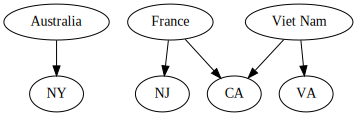

In [16]:
#Q13
file_state2 = file_state.copy()
def get_r(file):
    ip = list(df1[df1.file ==file]['ip'])
    for i in ip:
        region_l = list(df2[df2.ip ==i]['region'])
        if "Australia" in region_l or "France" in region_l or "Viet Nam" in region_l:
            return region_l
    return None
file_state2['region'] = file_state2['file'].apply(get_r)
file_state2 = file_state2.dropna()
country_state = pd.DataFrame()
country_list = []
state_list = []
for i in file_state2.index:
    countrys = file_state2.at[i,'region']
    for country in countrys:
        country_list.append(country)
        state = file_state2.at[i,'state']
        state_list.append(state)
country_state = pd.DataFrame({'country':country_list,'state': state_list})
country_state = country_state.drop_duplicates().sort_values(by = ["country"]).reset_index()
g = Digraph()
for i in country_state.index:
    g.edge(country_state.at[i,'country'],country_state.at[i,'state'])
g

In [17]:
#Q14
file_list = []
addresses_list = []
count_list = []
for file in filename_filing.keys():
    count = df3[df3["file"]==file]["count"].iloc[0]
    for add in filename_filing[file].addresses:
        file_list.append(file)
        addresses_list.append(add)
        count_list.append(count)
file_addresses = pd.DataFrame({'file':file_list,'address': addresses_list,'count':count_list})
df7 = file_addresses.groupby(by = ["address"],sort=False).sum().sort_values(by = ["count"], ascending=False)
df7[df7["count"]>=225].to_dict()['count']

{'801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102': 720,
 '801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102\n817-334-4100': 464,
 '1114 AVENUE OF THE AMERICAS\n29TH FLOOR\nNEW YORK NY 10036': 356,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104': 305,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383\n425-442-0931': 289,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383': 289,
 '1881 GROVE AVENUE\nRADFORD VA 24141': 277,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104\n3125066500': 264,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3\n604-683-6332': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3': 225,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020': 225,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020\n212-956-2221': 225}

<AxesSubplot:>

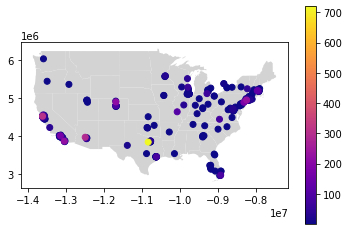

In [18]:
#Q15
background = gpd.read_file("shapes/cb_2018_us_state_20m.shp")
location = gpd.read_file("locations.geojson")
location = location.drop_duplicates()
df7 = df7.reset_index()
result = pd.merge(location,df7, on="address")
result = result.sort_values(by = ["count"], ascending=True)
us_window = box(-130, 20,-55,50)
us = result.intersection(us_window)
us = result[~us.is_empty]
bg = background.intersection(us_window)
bg = bg[~bg.is_empty]
us = us.to_crs("epsg:3395")
bg = bg.to_crs(us.crs)
fig, ax = plt.subplots()
bg.plot(ax=ax,color="lightgray")
us.plot(ax=ax,cmap=cm.plasma,column="count",legend=True)